## Final Project Submission

Please fill out:
* Student name: Aaron Lee
* Student pace: self paced
* Scheduled project review date/time: ???
* Instructor name: Jeff Herman
* Blog post URL: ??????


#  Questions for this project
- Which variables have the strongest correlation with home price.
- How does proximity to city center affect the home price in King County.  Use folium and distance column
- How much should you spend on a renovation and still expect a return on investment.

# Exploratory Data Analysis


## Import Data

We will start by importing the King County data and do some exploratory data analysis.
  

In [15]:
# Import libraries used in this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
%matplotlib inline


## First look at data set
### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [16]:
# Import data set from provided csv
kc = pd.read_csv('kc_house_data.csv')
kc.head()  # good import
kc.info()  # mix of floats and ints except for date and sqft_basement
kc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Look at the distributions of our variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc573f6d908>,
      dtype=object)

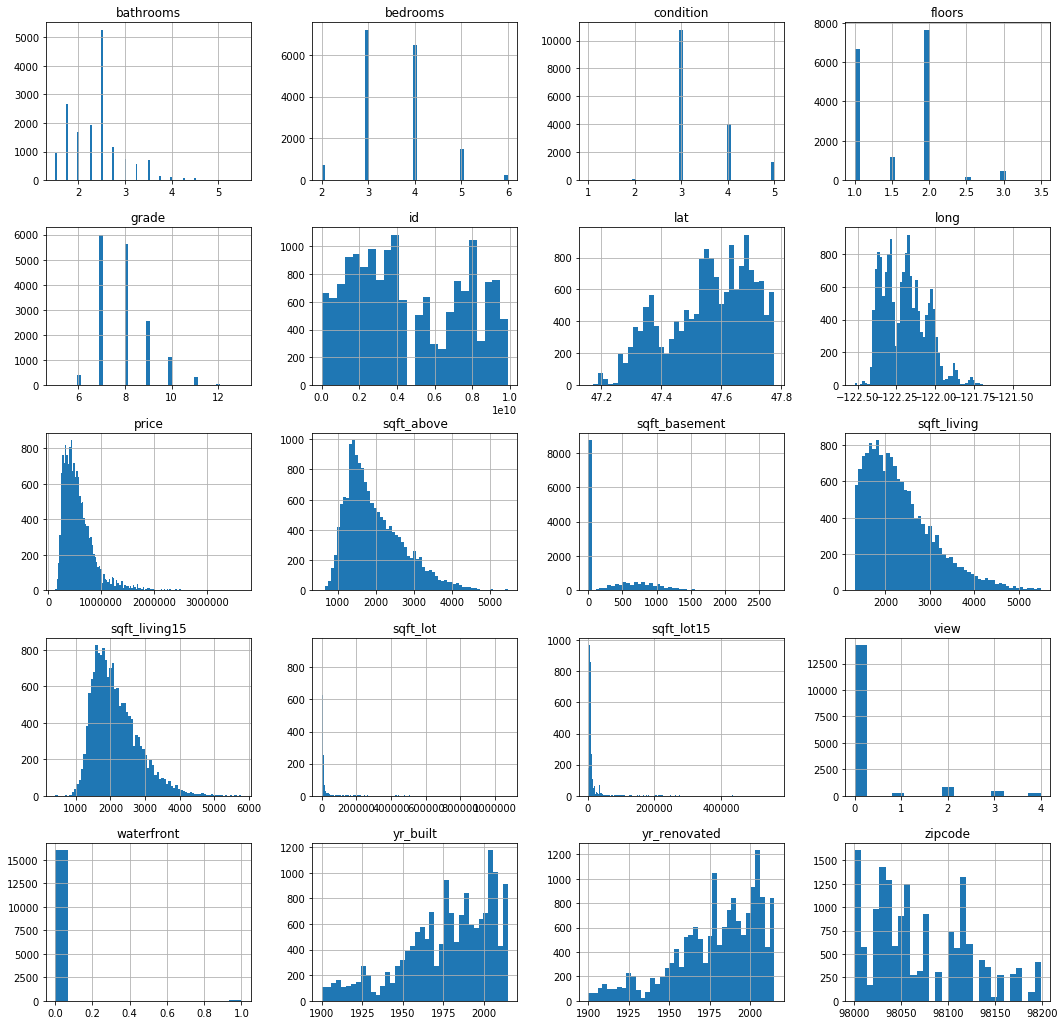

In [25]:
# Before plotting, let's take care of the basement_sqft which is currently a string object
kc.sqft_basement = pd.to_numeric(kc.sqft_basement, errors='coerce')

# Make a histogram of each variable to get an idea of the shapes
kc.hist(figsize=(18,18), bins='auto')

#### Categorical data   
Very few waterfront properties in genera.
Very few homes have any renovations.

#### Continuous data
All have an normal shape with a heavy right skew.  Can probably be fixed with a log graph.
Looks like there are a lot of zero values for sqft_basement (no basement)


## Scatter Matrix of Numerical Data

As a preliminary attempt to identify relationships between continuous data, we will make a scatter matrix.


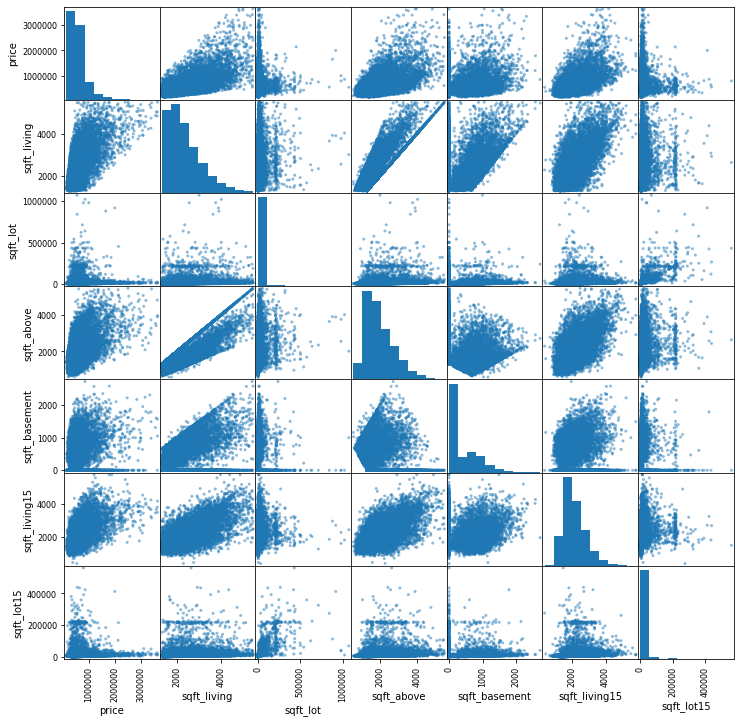

In [26]:
# identify all of the continous data columns from our set.
all_continuous = ['price', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']

kc_all_continuous = kc.loc[:, all_continuous]
pd.plotting.scatter_matrix(kc_all_continuous, figsize=[12, 12]);



#### Scatter matrix results
We see an obvious relationship between all of the sqft categories as expected.  A large home is likely to be on a large lot with a large basement etc.  This might not hold true for dense urban and more sparse rural areas.

At first glance, price seems to be most strongly related to sqft_living.  

## Preprocess Data

### Address NaN values and placeholders
We will look for NaN values and anomolies as well as filter out any unwanted data.

In [27]:
# Look for missing data and anomolies.
kc.isna().sum()  

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view              49
condition          0
grade              0
sqft_above         0
sqft_basement    326
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

We see three columns with NaN values
'waterfront' has 2376 NaN.  That is nearly 10% of the data.  We will not remove it, but assume no entry means 0 (not waterfront)

yr_renovated 
- has 3842 NaN.  I will interpret this as no renovation done to this house.
- also has a year of zero for all but 4586 houses which we also interpret as no renovation.
- could make a categorical was_renovated to track whether it has been renovated.

view
- has 63 NaN values
- will drop this column from the set as I don't see an obvious way to use this data.


### Process duplicates and anomolies

[1991. 1965. 1987. 2001. 1995. 2003. 1977. 1900. 1979. 1994. 1947. 1968.
 1985. 1941. 1915. 1948. 2005. 1929. 1981. 2002. 1904. 1996. 2000. 1984.
 2014. 1953. 1966. 1950. 1927. 2008. 1959. 1973. 1925. 1989. 1916. 1986.
 1956. 1992. 1964. 1961. 2006. 1988. 1939. 1967. 1980. 1910. 1983. 2010.
 1978. 1942. 1971. 1924. 1990. 1926. 2004. 2007. 1960. 1962. 1975. 1976.
 1949. 1999. 1954. 1955. 1993. 1969. 1920. 1997. 1918. 1928. 1974. 1982.
 1908. 1963. 1957. 1998. 1913. 1921. 2013. 1922. 1911. 1940. 1958. 2011.
 2012. 1972. 1951. 1930. 1946. 1952. 1902. 2009. 1931. 1945. 2015. 1934.
 1937. 1970. 1905. 1938. 1912. 1919. 1914. 1917. 1909. 1936. 1944. 1906.
 1903. 1907. 1901. 1933. 1923. 1932. 1943. 1935.]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16102 entries, 1 to 21595
Data columns (total 21 columns):
id               16102 non-null int64
date             16102 non-null datetime64[ns]
price            16102 non-null float64
bedrooms         16102 non-null int64
bathrooms        1610

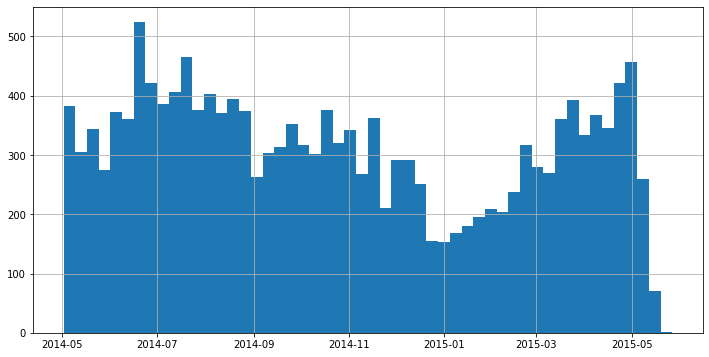

In [44]:
# First, lets see if we have any duplicates
kc.loc[~kc.index.duplicated(keep='first')].count()
# no duplicates found.  That's good


# Waterfront has some NaN values.  Likely data entry left blank for non waterfront properties.
kc.waterfront.unique()  # contains NaNs
# replace waterfront NaN with 0
values = {'waterfront': 0, 'yr_renovated': 0}
kc = kc.fillna(value=values)


# Let's get rid of the zero's and assume there was no renovation done.
# We will make yr_renovated equal to the build year since new construction is a 'renovation'.
#kc.loc[kc['yr_renovated'] == 0] = kc.loc[kc['yr_renovated'] <= 1900]['yr_built']
kc['yr_renovated'] = np.where(kc['yr_renovated'] == 0, kc['yr_built'], kc['yr_renovated'])
print(kc.yr_renovated.unique())


kc.view.unique()
# remove view NaN indexes
# I wil not be using view, so I will ignore / drop


# change the date to datetime object so I can extract month and year and order them
kc['date'] = pd.to_datetime(kc['date'])
kc.info()



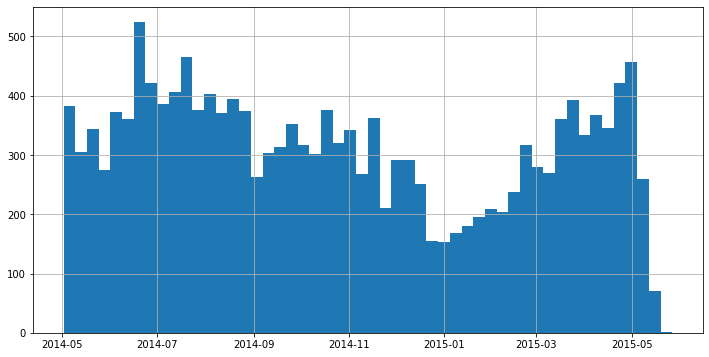

In [45]:
# Since I converted date, I thought it would be interesting to look at sales by date.  
#. Each bin represents a week.  There is a definite sales period in spring/summer and low points in winter months.

# might be worthwhile to investigate the effect of time of year on saleprice as well
kc['date'].hist(bins=52, figsize=[12,6])

In [46]:
# Get rid of any odd data or extreme outliers that we might be using
sorted(kc['yr_built'].unique())  # looks good


# Bedrooms
sorted(kc['bedrooms'].unique())  
# We have a place with 33 rooms!!  (typo?). Let's drop it
# Also looking at other many bedroomed places, there are a few inconsistencies, 
# eg.  9 bedroom 2 bath and 8 bedroom with 2200 sqft.
# I decided to drop anything more than 6 beds.  Narrows it to more typical family homes.  We lose 62 properties.
kc = kc.loc[(kc['bedrooms'] > 1) & (kc['bedrooms'] <= 6)]  


# Bathrooms
sorted(kc['bathrooms'].unique())
# I chose to drop the half bath.  Does not seem like a typical home if we don't have a shower/tub
kc = kc.loc[(kc['bathrooms'] >= 1.5) & (kc['bathrooms'] < 6)]  


# Condition
sorted(kc['condition'].unique())  # Looks good


# Zipcode
sorted(kc['zipcode'].unique())  # looks good

# sqft_living
#sorted(kc['sqft_living'].unique())[:100]  # looks at small and large homes
# will chop off the tails.  Under 1300 and over 5500.  These are probably more suitable to our model and reflect
# typical homes we are interested in.
kc = kc.loc[(kc['sqft_living'] > 1300) & (kc['sqft_living'] < 5500)]

kc.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.610200e+04,1.610200e+04,16102.000000,16102.000000,16102.000000,1.610200e+04,16102.000000,16102.000000,16053.000000,16102.000000,16102.000000,16102.000000,15776.000000,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000,16102.000000
mean,4.620931e+09,5.894309e+05,3.589057,2.390914,2341.437399,1.628989e+04,1.581387,0.007390,0.272161,3.400075,7.949447,1990.675755,350.796146,1977.077382,1979.142964,98071.438579,47.558628,-122.196762,2151.723513,13664.871941
std,2.889678e+09,3.487512e+05,0.780794,0.574487,767.382144,4.168255e+04,0.537755,0.085652,0.820705,0.638919,1.081570,770.089228,462.143888,27.483143,26.562769,51.972375,0.140154,0.140370,657.253048,27465.005298
min,1.000102e+06,1.330000e+05,2.000000,1.500000,1310.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,5.000000,580.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,794.000000
25%,2.140950e+09,3.635000e+05,3.000000,2.000000,1750.000000,5.267000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1410.000000,0.000000,1961.000000,1963.000000,98030.000000,47.460200,-122.312000,1660.000000,5292.250000
50%,3.928450e+09,5.089000e+05,4.000000,2.500000,2170.000000,7.893000e+03,2.000000,0.000000,0.000000,3.000000,8.000000,1800.000000,0.000000,1981.000000,1984.000000,98058.000000,47.574700,-122.201000,2030.000000,7820.000000
75%,7.402650e+09,7.023750e+05,4.000000,2.500000,2760.000000,1.142350e+04,2.000000,0.000000,0.000000,4.000000,9.000000,2440.000000,700.000000,2000.000000,2001.000000,98115.000000,47.676075,-122.107000,2525.250000,10597.750000
max,9.895000e+09,3.650000e+06,6.000000,5.500000,5490.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,5480.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,5790.000000,560617.000000


The dataFrame is now all numerical and datetime objects.

In [47]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Choose the columns I want to use to answer my questions.
## let's leave out the following:
- floors, not of interest.  The floors is a function of home style, era, and area mostly. Should be teased out in other categories
- view, unlikely to be consequential to the price
- grade, has values from 3 to 13 with missing values.  Will use 'condition' col instead which is a simple 1 to 5.
- sqft_above, sqft_basement.  We will use the sqft_living as the size of the home and ignore others
- yr_built.  We will use renovated year instead since we addressed no renovation issue to include year built
- date.  All dates are with a year range.  We could investigate month or week though to see how it affects price
- waterfront.  We now have nearest_water
- nearest 15 data.  We will use sqft data only.  I feel like this could affect the model if we include too many sqft.  Can alter later maybe.

## We will keep:
- price will be our feature of interest
- bedrooms (>1 to 5)
- bathrooms (>1 to 6)
- sqft_living (size of home)
- condition (1 to 5)
- nearest_water (incorporates waterfront data also)
- zipcode 
- yr_renovated (inclueds yr_built data)
- school_district (may use it instead of zip if the data looks good)
- lat, long, but will change it to map Point objects


In [48]:
# I am also interested in school districts and distance to waterfront properties.  Will add that later
categorical = ['bedrooms', 'bathrooms', 'condition', 'yr_renovated', 'zipcode', 'school_district']
continuous = ['price', 'sqft_living', 'nearest_water']
location = ['lat', 'long']  # need this for my maps and shapes
to_drop = ['id', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']


## Location, location, location.

I am really interested in location data, and was given long/lat on my homes in this dataset.
Let's do some investigating.

In [49]:

import folium
import pandas as pd
import folium.plugins

import branca
import branca.colormap as cm




centerlat = (kc['lat'].max() + kc['lat'].min()) / 2
centerlong = (kc['long'].max() + kc['long'].min()) / 2



colormap = cm.LinearColormap(colors=['green', 'yellow', 'orange', 'red'],vmin=100000,vmax=1600000)

m = folium.Map(location=[centerlat, centerlong], zoom_start=10, tiles='Stamen Toner',
)

for i in range(len(kc)):
    folium.Circle(
        location=[kc.iloc[i]['lat'], kc.iloc[i]['long']],
        radius=20,
        fill=True,
        color=colormap(kc.iloc[i]['price']),
        fill_opacity=0.5
    ).add_to(m)

m.add_child(colormap)

# Save map 
# I found a problem with plotting too much data (over 2000 pts) to jupyter notebook
m.save('colormap_price.html')

## Add school district data to my set

After some research, it looks like the old adage "location, location, location" seems to have some merit.
Homes near city centers, shopping, water, recreation, and good school districts have higher value.

I will add school district data to my project.  King County has 20 school districts.
I included the geojson shape files from the King County GIS website and will extract the district info using
lat/long information.

In [50]:
import folium  # for later plotting if needed
import json

# might not need all of these
from shapely.geometry import Polygon, Point, MultiPolygon, shape, GeometryCollection



kc_schools = kc.copy()

# load GeoJSON file containing sectors

my_shapes = "districts.geojson"  # geojson shape file for district boundaries

with open(my_shapes, 'r') as f:
    school_geo_data = json.load(f)

    
# investigating the features provided in json file
print(school_geo_data['features'][0].keys())
kc_schools.columns
school_geo_data.keys()
dist1 = school_geo_data['features'][0]['geometry']
#print(dist1)

# make a list of the names of the school districts to appy later
dist_names = [x["properties"]["NAME"] for x in school_geo_data['features']]  # It worked!
#print(dist_names)

# NOTE: buffer(0) is a trick for fixing scenarios where polygons have overlapping coordinates 
# We go through every item in the geojson features, and create mappable polygons from it
polygons = GeometryCollection([shape(feature["geometry"]).buffer(0) for feature in school_geo_data['features']])
polygons[0]


def make_point(longlat):
    '''
    Returns a shapely Point object from a latlong location.

            Parameters:
                    latlong (list): iterable of len 2 [lat, long]

            Returns:
                    Point object
    '''
    # note that the point requires (long, lat) or (x, y) format
    return Point(longlat[0], longlat[1])


# create a combined latlong column
kc_schools['longlat'] = list(zip(kc_schools.long, kc_schools.lat))

# use my new make_point function to create a column of Point objects for plotting
kc_schools['points'] = kc_schools['longlat'].apply(make_point)
kc_schools
 
# # 66 do not product points. We will drop them.
# This appears to be a boundary problem with the geojson coordinates.  Houses on immediate edge are not counted.
# There is likely a fix, but it only costs 66 lines for now, so will save that for later if I have time.
kc_schools.dropna(inplace=True)
    


def which_district(point, polygon_list, district_names):
    '''
    Returns the name from district_names list if point is in polygon from polygon_list
            
            Parameters:
                    point (Point object): Shapely Point
                    polygon_list (list): Shapely Shape objects (MultiPolygon)
                    district_names (list): list of school district names taken from geo_data

            Returns:
                    binary_sum (str): Binary string of the sum of a and b
    '''
    count = 0
    name = 'None'
    for i in range(len(polygon_list)):
        if polygon_list[i].contains(point):
            name = district_names[i]
            count += 1
    if count == 1: return name
    else: print("District ID failure at", point)

        
kc_schools['school_district'] = kc_schools['points'].apply(which_district, args=(polygons, dist_names,))

    
# # get the mean value across all districts
district_data = kc_schools.groupby('school_district').aggregate(np.mean)
district_data['price'] = district_data['price'].round(-3) // 1000
district_data.reset_index(inplace = True)
district_data.price.describe()



dict_keys(['type', 'properties', 'geometry'])
District ID failure at POINT (-122.259 47.7165)
District ID failure at POINT (-122.076 47.5784)
District ID failure at POINT (-122.204 47.5716)
District ID failure at POINT (-122.083 47.5968)
District ID failure at POINT (-122.324 47.3571)
District ID failure at POINT (-122.216 47.6967)
District ID failure at POINT (-122.324 47.3573)
District ID failure at POINT (-122.465 47.3979)
District ID failure at POINT (-122.11 47.5943)


count      20.000000
mean      511.850000
std       224.803136
min       302.000000
25%       335.750000
50%       451.500000
75%       592.250000
max      1142.000000
Name: price, dtype: float64

## Add Distance to Waterfront

Another location based property I am interested in including is the distance from a home to the waterfront.

While there are only 141 waterfront properties, you can see that they all sit on the lakes and islands which are very desirable locations.

I want to add a column which calculates the linear distance to the nearest waterfront positive property.




In [51]:
kc_water = kc_schools.copy()

def find_closest_water(point, df):
    # get a series of all of the homes except the current one
    neighbors = df['points']
    return neighbors.apply(point.distance).min()

waterfront_properties = kc_water[kc_water['waterfront'] == True]
kc_water.waterfront.sum()


test_point = kc_water['points'][10]
find_closest_water(test_point, waterfront_properties)


kc_water['nearest_water'] = kc_water['points'].apply(find_closest_water, args=(waterfront_properties,))
kc_water['nearest_water'] = kc_water['nearest_water'].apply(lambda x: x * 68.94)  # conversion to miles
kc_water['nearest_water'].describe()



count    15728.000000
mean         4.598014
std          4.730774
min          0.000000
25%          1.535146
50%          2.990081
75%          5.737316
max         51.859768
Name: nearest_water, dtype: float64

## Scatter Plots vs Price
Since we will primarily be looking at how price affects the

In [36]:
kc_water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15728 entries, 1 to 21595
Data columns (total 25 columns):
id                 15728 non-null int64
date               15728 non-null datetime64[ns]
price              15728 non-null float64
bedrooms           15728 non-null int64
bathrooms          15728 non-null float64
sqft_living        15728 non-null int64
sqft_lot           15728 non-null int64
floors             15728 non-null float64
waterfront         15728 non-null float64
view               15728 non-null float64
condition          15728 non-null int64
grade              15728 non-null int64
sqft_above         15728 non-null int64
sqft_basement      15728 non-null float64
yr_built           15728 non-null int64
yr_renovated       15728 non-null float64
zipcode            15728 non-null int64
lat                15728 non-null float64
long               15728 non-null float64
sqft_living15      15728 non-null int64
sqft_lot15         15728 non-null int64
longlat            15728

KeyError: "['latlong'] not found in axis"

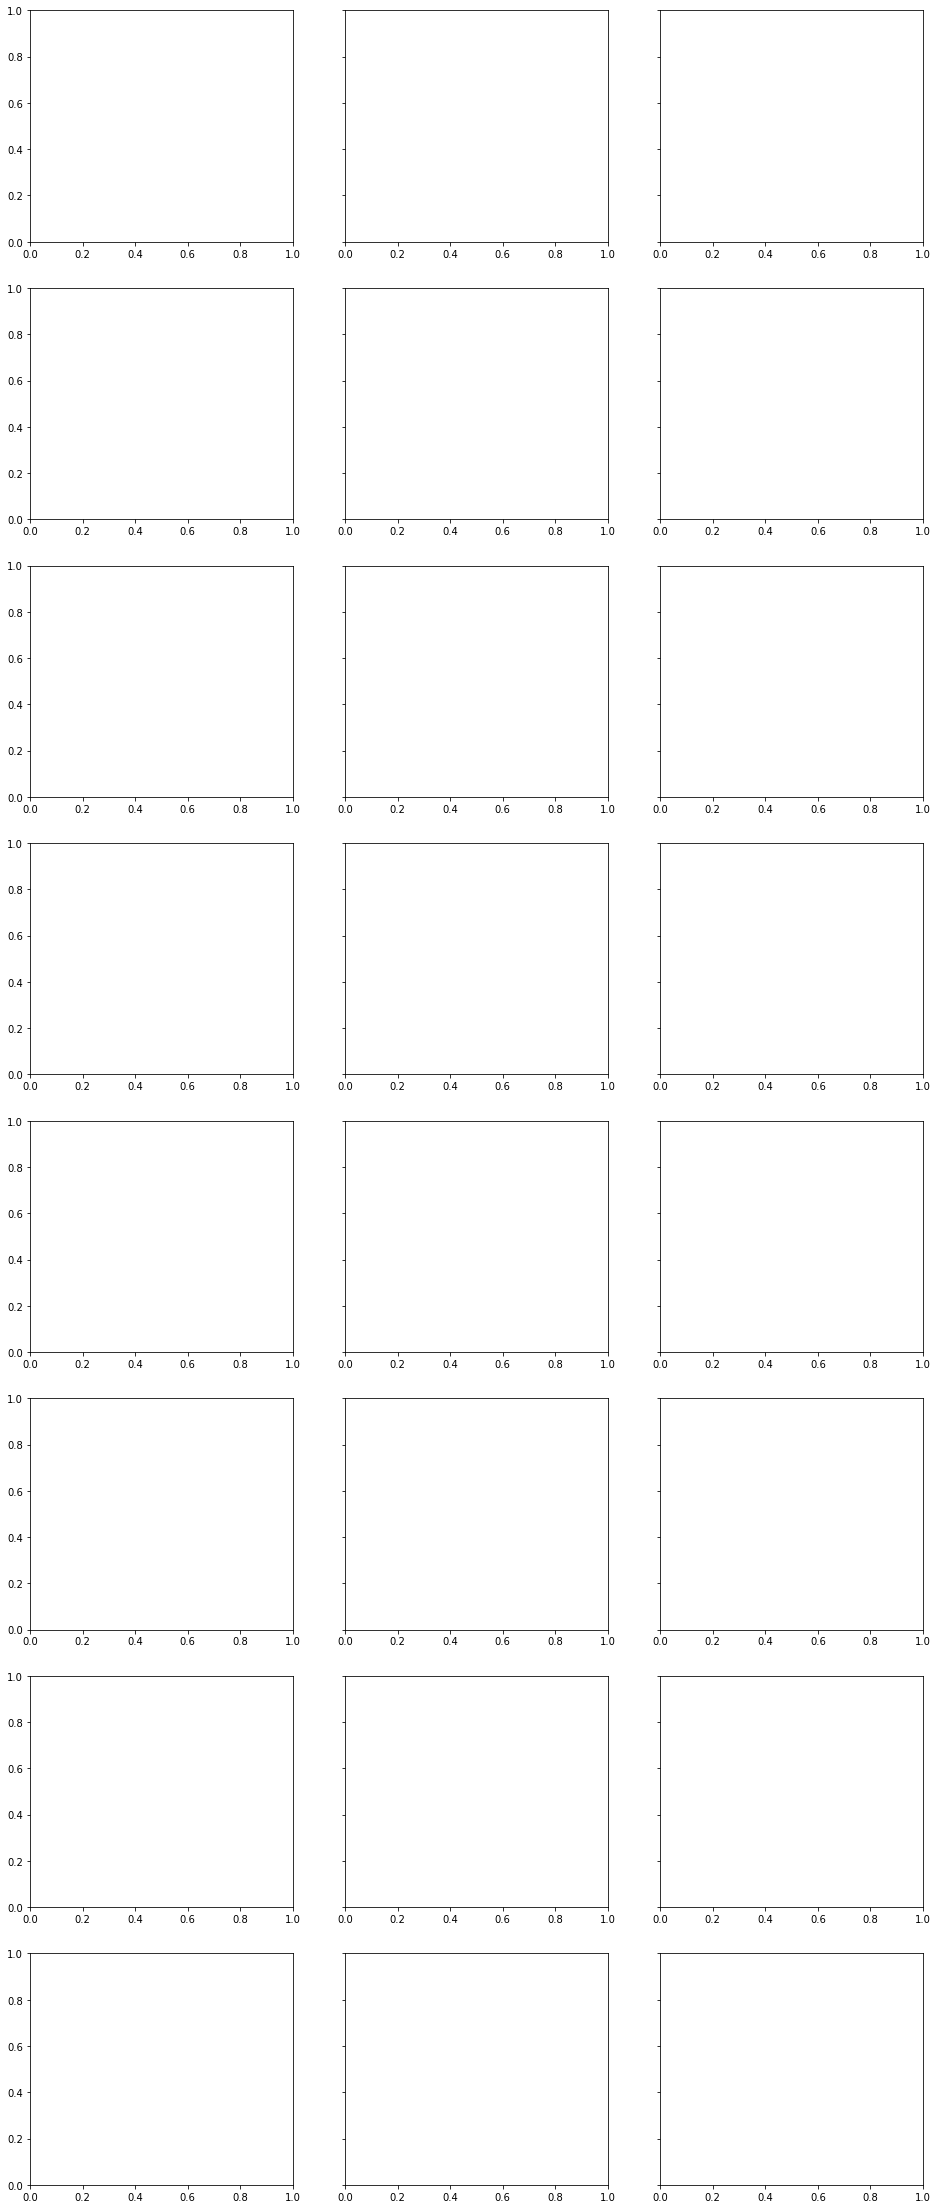

In [37]:

# Take a look at the scatter plots of all variables vs. price
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(16,40), sharey=True)
kc_plot = kc_transit.drop(['points', 'latlong', 'school_district'], axis=1)

for ax, column in zip(axes.flatten(), kc_plot.columns):
    ax.scatter(kc_plot[column], kc_plot['price'] / 1000, label=column, alpha=.2)
    ax.set_title('Sale Price vs {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in thousands $')

    
fig.tight_layout()

In [ ]:
# Lets look at some regressions for all of my chosen cats

# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


results = []
for idx, column in enumerate(kc_cats.columns):
    print (f"Housing Data - Regression Analysis and Diagnostics for Price~{column}")
    
    f = f'price~{column}'  # create my model formula
    model = smf.ols(formula=f, data=kc_cats).fit()  # fit the model
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

result_df = pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])
result_df

In [ ]:
kc_cont = kc_water[continuous]

kc_cont.hist(figsize=[18,10], bins='auto')

In [ ]:
# log features
log_names = ['{}_log'.format(column) for column in kc_cont.columns]

kc_log = np.log(kc_cont)
kc_log.columns = log_names
print(kc_log.head())

kc_log.hist(figsize=[18,10], bins='auto')

In [ ]:
# normalize (subract mean and divide by std)
def normalize(feature):
    # returns a normalized standard score between 
    return (feature - feature.mean()) / feature.std()


kc_log_norm = kc_log.apply(normalize)
kc_log_norm.hist(figsize=[18,10], bins='auto')




In [ ]:
from functools import reduce

kc[categorical].nunique()


# Thought this would work, but failed.  Prefix len problem
# dummies = pd.get_dummies(kc[categorical[0]], prefix=categorical[0], drop_first=True)
# dummies


def add_dummies(df, cats):
    dummies = []
    for cat in cats:
        dummy = pd.get_dummies(df[cat], prefix=cat, drop_first=True)
        dummies.append(dummy)

    dummies_df = pd.concat(dummies, axis=1, sort=False)                   
    return dummies_df

                       
# one hot encode categoricals
kc_ohe = add_dummies(kc, categorical)
                       
preprocessed = pd.concat([kc_log_norm, kc_ohe], axis=1)

preprocessed.describe()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

regression = LinearRegression()

X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

crossvalidation = KFold(n_splits=9, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

#preprocessed.columns 

# Show a Folium map of prices by zipcode

In [ ]:
import folium
#from IPython.display import display


shape = "Zipcodes_for_King_County_and_Surrounding_Area__Shorelines____zipcode_shore_area.geojson"
with open(shape, 'r') as f:
    geo_data = json.load(f)

#print(geo_data['features'])
geo_data['features'][0].keys()
    
# Set zipcode type to string (folium)  
# HAD TO LOOK THIS ONE UP
kc_zip = kc.copy()
kc_zip['zipcode'] = kc_zip['zipcode'].astype('str')




# get the mean value across all zipcodes
zipcode_data = kc_zip.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace = True)
#print(zipcode_data.head())

#m = folium.Map(location=[centerlat, centerlong], zoom_start=9)




def map_by_zipcode(zipcode_data, col):
    """
    Generates a folium map of King County with selected feature mean
        :param zipcode_data: zipcode dataset
        :param feature: feature to display
        :return: m (Folium Map object)
    """

    # Initialize Folium Map with Seattle latitude and longitude
    m = folium.Map(location=[centerlat, centerlong], 
                   zoom_start=9,
                   control_scale=False,
                   tiles='Stamen Toner')
    

    # Create choropleth map  
    folium.Choropleth(
        geo_data=geo_data,
        name='choropleth',
        data=zipcode_data,
        columns=['zipcode', col],
        key_on='feature.properties.ZIPCODE',
        fill_color='Spectral',
        fill_opacity=0.6,
        nan_fill_opacity=0,
        line_opacity=1,
        legend_name= (col + ' mean').upper()
    ).add_to(m)
    
    #folium.LayerControl().add_to(m)

    return m


feature = 'price'  # Change this to investigate other relationships
m = map_by_zipcode(zipcode_data, feature)

# Save map based on feature of interest
m.save(feature + '.html')
zipcode_data.head(50)

In [ ]:
# Thought it would be interesting to make a heat map
# Turns out this is not really the thing because the density messes it up
# import folium
# from folium import plugins
# from folium.plugins import HeatMap


# heat_feature = 'price'

# lats = kc.lat
# lons = kc.long
# feat = kc[heat_feature]

# m2 = folium.Map(location=[centerlat, centerlong], control_scale=True, zoom_start=10)

# HeatMap(min_opacity=0.2, data=zip(lats, lons, feat//np.mean(feat))).add_to(m2)
# m2
kc.iloc[0]['lat']

In [ ]:
# TROUBLESHOOTING
# Something is not working here.
# My average home values are not right.  Must be identifying wrong points.  
# Lets try to plot single districts and see which one is screwed up.

def plot_district(district, df):
    
    m = folium.Map(
        location=[centerlat, centerlong],
        zoom_start=9
    )
    
    homes = df.loc[df['school_district'] == district]
    
    for i in range(len(homes)):
        folium.Marker(
                [homes.iloc[i]['lat'], homes.iloc[i]['long']],
            ).add_to(m)

    return m
    
#plot_district('Mercer Island', kc_schools)


def plot_waterfront(df):
    m = folium.Map(
        location=[centerlat, centerlong],
        zoom_start=9
    )
    
    homes = df.loc[df['waterfront'] == True]
    
    for i in range(len(homes)):
        folium.Marker(
                [homes.iloc[i]['lat'], homes.iloc[i]['long']],
            ).add_to(m)

    return m


def plot_all(df):
    m = folium.Map(
        location=[centerlat, centerlong],
        zoom_start=10
    )
        
    for i in range(len(df)):
        folium.Marker(
                [df.iloc[i]['lat'], df.iloc[i]['long']],
            ).add_to(m)

    return m

kc_water.columns
plot_all(kc_water[kc_water['nearest_water'] < 0.1])
#kc_water.nearest_water.describe()

In [ ]:
import datetime
# MAke a school district map in folium


def map_by_schooldist(data, col):
    """
    Generates a folium map of King County with selected feature mean
        :param data: district dataset
        :param col: feature to display
        :return: m (Folium Map object)
    """

    # Initialize Folium Map with Seattle latitude and longitude
    m = folium.Map(location=[centerlat, centerlong], 
                   zoom_start=10,
                   control_scale=False)
                   #tiles='Stamen Toner')
    

    # Create choropleth map  
    folium.Choropleth(
        geo_data=school_geo_data,
        name='choropleth',
        data=data,
        columns=['school_district', col],
        key_on='feature.properties.NAME',
        fill_color='Spectral',
        fill_opacity=0.8,
        nan_fill_opacity=0,
        line_opacity=1,
        legend_name='mean ' + col + " x $1000"
    ).add_to(m)
    
    folium.LayerControl().add_to(m)

    return m




# make a year sold column



# Clean up from the district stuff
kc_schools.dropna(inplace=True)
kc_schools.isna().sum()
kc_schools = kc_schools[kc_schools['school_district'] != '99']
#kc_schools2 = pd.concat([kc_schools, kc_log_norm], axis=1)
#num = (kc_schools2['price_log'] - kc_schools2['price_log'].min())
#den = (kc_schools2['price_log'].max() - kc_schools2['price_log'].min())




# I decided to scale it from 0 to 6 and make into categories.
# Turns out it puts it at 2 to 8
#kc_schools2['price_log'] = (num / den * 100) // 1


## Make a year sold so we can filter out old sales
kc_schools['yr_sold'] = pd.DatetimeIndex(kc_schools['date']).year  # inconsequential


feature = 'price'  # Change this to investigate other relationships
m3 = map_by_schooldist(district_data, feature)

# Save map based on feature of interest
m3.save(feature + '_schools.html')


kc_schools.info()